In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')


# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# 머신러닝 알고리즘 - 회귀
from sklearn.svm import SVR



# 시간 측정을 위한 시간 모듈

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
#!pip install xgboost
#!pip install lightgbm
#!pip install pandas_datareader
#!pip install konlpy
#!pip install pytagcloud
#!pip install pygame
#!pip install simplejson
!pip install nltk


In [2]:
df=pd.read_csv("크롤링/N Seoul Tower.csv")
df['y']=[0 if rank<=3.0 else 1 for rank in df['STAR']]
df

,Unnamed: 0,STAR,CONTENT,y
0,0,5.0,Seoul tower is very peacfull and one of clean ...,1
1,1,4.0,We have walked up and down It is a good walk ...,1
2,2,4.0,It was a bit late to open and it was raining ...,1
3,3,5.0,It was nice to be able to see the beautiful n...,1
4,4,5.0,Got there at dusk By the time we got into the ...,1
...,...,...,...,...
5503,5503,3.0,when I visit here there is no cherry blossoms ...,0
5504,5504,4.0,It gives a beautiful view of the city. It is b...,1
5505,5505,4.0,"great view from the observatory, yet Tokyo tow...",1
5506,5506,5.0,There are good trails around here and amazing ...,1


In [3]:
#nltk.download()
# konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출한다.
import nltk
stopwords=nltk.corpus.stopwords.words('english')
def get_pos (x) :
    token=nltk.word_tokenize(x)
    pos = nltk.pos_tag(token)
    
    result = []
    for a1 in pos :
        if a1[0] not in stopwords:
            result.append(f'{a1[0]}/{a1[1]}')
    
    return result

In [4]:
get_pos("I am going to Seoul, Korea.")

['I/PRP', 'going/VBG', 'Seoul/NNP', ',/,', 'Korea/NNP', './.']

In [5]:
index_vectorizer=CountVectorizer(tokenizer=lambda x:get_pos(x))
X=index_vectorizer.fit_transform(df["CONTENT"].tolist())
X

<5508x14585 sparse matrix of type '<class 'numpy.int64'>'
	with 186367 stored elements in Compressed Sparse Row format>

In [6]:
index_vectorizer.vocabulary_

{'seoul/NN': 11095,
 'tower/NN': 13013,
 'peacfull/JJ': 9373,
 'one/CD': 8923,
 'clean/JJ': 3001,
 'place/NN': 9598,
 'visit/NN': 13680,
 'life/NN': 7371,
 'beautiful/JJ': 1980,
 'city/NN': 2980,
 'view/NN': 13632,
 'fantastic/JJ': 5037,
 'gardens/NNS': 5540,
 'trees/NNS': 13149,
 'highly/RB': 6146,
 'suggest/VB': 12224,
 'visit/VB': 13684,
 'visit/VBP': 13686,
 'seoul/JJ': 11093,
 'must/MD': 8310,
 'add/VB': 1160,
 'booking/VBG': 2240,
 'list/NN': 7457,
 'come/VBP': 3199,
 'love/VB': 7643,
 'spend/VB': 11804,
 'time/NN': 12821,
 'walked/VBN': 13801,
 'good/JJ': 5704,
 'walk/NN': 13787,
 'side/NN': 11328,
 'stairs/NN': 11932,
 'path/NN': 9333,
 'forest/JJS': 5355,
 'visibility/NN': 13667,
 'bit/NN': 2136,
 'poor/JJ': 9733,
 'expected/VBN': 4885,
 'cloudy/NN': 3098,
 'weather/NN': 13936,
 'late/JJ': 7229,
 'open/VB': 8954,
 'raining/VBG': 10201,
 'hard/JJ': 5969,
 'wait/VB': 13774,
 'outside/JJ': 9080,
 'still/RB': 12051,
 'nice/JJ': 8584,
 'able/JJ': 1069,
 'see/VB': 11013,
 'night/NN'

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
# TFidf 변환 모델 생성
tfidf_transformer = TfidfTransformer()
# 형태소 벡터 변환하기
X = tfidf_transformer.fit_transform(X)
for i in range(10):
    print(X[i])
    print("*"*20)


  (0, 13686)	0.21085581835945205
  (0, 13684)	0.12214892915858774
  (0, 13680)	0.13789266941015305
  (0, 13632)	0.06774680352759616
  (0, 13149)	0.18498551743834002
  (0, 13013)	0.059481342234989555
  (0, 12821)	0.10435500854615
  (0, 12224)	0.22893886806314684
  (0, 11804)	0.18471427528834
  (0, 11095)	0.07062242124366407
  (0, 11093)	0.1559158536771498
  (0, 9598)	0.19277852672273685
  (0, 9373)	0.35691158648257637
  (0, 8923)	0.11715471129526081
  (0, 8310)	0.12979565772822335
  (0, 7643)	0.17823924918752546
  (0, 7457)	0.24475456528353462
  (0, 7371)	0.24017722864503846
  (0, 6146)	0.19446112313398303
  (0, 5540)	0.2628376149872294
  (0, 5037)	0.18338498145555907
  (0, 3199)	0.20785380584697158
  (0, 3001)	0.2093266616353559
  (0, 2980)	0.0874498342029749
  (0, 2240)	0.3202525683487528
  (0, 1980)	0.12070403649165434
  (0, 1160)	0.23607023469181604
********************
  (0, 13936)	0.20419048985001112
  (0, 13801)	0.314082659923477
  (0, 13787)	0.1661316469582696
  (0, 13667)	0.290

In [58]:
.get_feature_names()

TypeError: __init__() got an unexpected keyword argument 'stopwords'

In [8]:
# SVM(SVC)
y=df['y']
model3 = SVC(kernel='linear')
model3.fit(X, y)

SVC(kernel='linear')

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

accuracy: 0.92
precision: 0.91
recall: 1.00
F1: 0.95


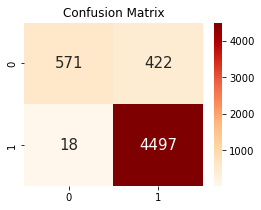

In [10]:
y_pred = model3.predict(X)
print('accuracy: %.2f' % accuracy_score(y, y_pred))
print('precision: %.2f' % precision_score(y, y_pred))
print('recall: %.2f' % recall_score(y, y_pred))
print('F1: %.2f' % f1_score(y, y_pred))

# confusion matrix

confu = confusion_matrix(y_true = y, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#LDA를 하기 위해 필요한 전처리들을 차례대로 진행하는 함수
from nltk.stem import WordNetLemmatizer

def preprocess(df, stop_words):
    text = df[['리뷰']]

    #토큰화
    text['리뷰'] = text.apply(lambda row: nltk.word_tokenize(row['리뷰']), axis=1)

    #불용어 처리
    text['리뷰'] = text['리뷰'].apply(lambda x: [word.lower() for word in x])
    text['리뷰'] = text['리뷰'].apply(lambda x: [word for word in x if word not in (stop_words)])

    #표제어 추출
    text['리뷰'] = text['리뷰'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
    #길이가 3이하인 단어에 대해서 제거하는 작업을 수행
    tokenized_doc = text['리뷰'].apply(lambda x : [word for word in x if len(word) > 3])
    
    #tf-idf 행렬을 만들기 위해 역토큰화
    detokenized_doc = []
    for i in range(len(text)):
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
    text['리뷰'] = detokenized_doc
    
    return text['리뷰']

In [12]:
#LDA를 진행하는 함수
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def LDA(series, n_components=4, n_words=10):
    
    #LDA를 적용하기 위해 tf-idf 행렬 만들기
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(series)
    
    #토픽 모델링 - 잠재디리클레할당
    lda_model = LatentDirichletAllocation(n_components=n_components, learning_method='online', random_state=777, max_iter=1)
    lda_top = lda_model.fit_transform(X)
    
    #term : 문서 내 모든 단어의 집합.
    terms = vectorizer.get_feature_names()
    
    #모델로부터 얻은 토픽과 그 tf-idf값을 반환받음.
    topics = []
    for idx, topic in enumerate(lda_model.components_):
        print("Topic %d :" % (idx+1), [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-n_words -1:-1]])
        topics.append([(terms[i]) for i in topic.argsort()[:-n_words -1:-1]])
    
    #결과물을 보기 좋게 데이터 프레임으로 출력.
    return pd.DataFrame(topics)

In [13]:
df_lda = LDA(df['CONTENT'], 1, 10)

Topic 1 : [('tower', 350.46), ('seoul', 304.58), ('view', 275.47), ('city', 215.69), ('cable', 189.64), ('car', 187.18), ('place', 175.2), ('great', 174.45), ('night', 163.79), ('good', 160.17)]


In [14]:
df_pos=df[y_pred==1]
df_pos

,Unnamed: 0,STAR,CONTENT,y
0,0,5.0,Seoul tower is very peacfull and one of clean ...,1
1,1,4.0,We have walked up and down It is a good walk ...,1
2,2,4.0,It was a bit late to open and it was raining ...,1
3,3,5.0,It was nice to be able to see the beautiful n...,1
4,4,5.0,Got there at dusk By the time we got into the ...,1
...,...,...,...,...
5499,5499,4.0,Good photo for the lock and good scenery when ...,1
5502,5502,5.0,"Liked the views, the cable car trip, the resta...",1
5504,5504,4.0,It gives a beautiful view of the city. It is b...,1
5505,5505,4.0,"great view from the observatory, yet Tokyo tow...",1


In [15]:
pos_topic= LDA(df_pos['CONTENT'], 1, 10)

Topic 1 : [('tower', 315.86), ('seoul', 278.38), ('view', 236.35), ('city', 176.92), ('cable', 170.18), ('place', 167.67), ('car', 167.06), ('night', 151.67), ('great', 148.86), ('visit', 136.69)]


In [16]:
df_neg=df[y_pred==0]
df_neg

,Unnamed: 0,STAR,CONTENT,y
6,6,1.0,I went a few years ago and I didnt like it it...,0
60,60,2.0,Cable fee 50000 for a family of four 50000 fo...,0
66,66,2.0,A place you wont go unless you make up your mi...,0
67,67,3.0,too many people It costs 14000 won but there ...,0
83,83,3.0,I honestly expected much more The views are n...,0
...,...,...,...,...
5475,5475,3.0,You should time your visit during the sunset s...,0
5500,5500,3.0,"I have been to this tower twice, the second ti...",0
5501,5501,3.0,Nothing much to do here unless you're teenager...,0
5503,5503,3.0,when I visit here there is no cherry blossoms ...,0


In [17]:
neg_topic= LDA(df_neg['CONTENT'], 1, 10)

Topic 1 : [('tower', 27.3), ('view', 19.39), ('seoul', 16.35), ('car', 15.37), ('cable', 14.76), ('place', 11.93), ('just', 11.42), ('nice', 11.29), ('good', 11.0), ('city', 10.78)]


In [55]:
national_museum

,0,1,2,3,4,5,6,7,8,9
0,tower,seoul,view,city,cable,car,great,place,night,good
1,south,seoul,view,long,tower,city,weekend,nice,high,visit
2,excellent,icon,wonderful,attractions,view,devotions,capital,http,reacommed,seoul
